# Data Munging Part II - Filtering and Joining Datasets
This lab was adapted from # Glassdoor Jobs Data-Analysis 
https://github.com/Atharva-Phatak/Glassdoor-Jobs_Data-Analysis

In Data Munging Part I we learned how to explore our data and clean it up so that missing values are removed.

In this Data Munging Part II lab, we are going to learn how to:
1. Filter our Data
2. Sort Data 
3. Merge/Concatenate Data Sources

Recall that the point of data munging is to `wrangle` multiple data sources so that you can begin to perform data analysis on the data that you were given or scraped from the web. 

In most cases you are given a dataset and you must supplement your dataset with sources from web.

In this lab we will perform analysis of Glassdoor data

## About Glassdoor

![glass](https://upload.wikimedia.org/wikipedia/commons/e/e1/Glassdoor_logo.svg)

"Glassdoor is one of the world’s largest job and recruiting sites.

Built on the foundation of increasing workplace transparency, Glassdoor offers millions of the latest job listings, combined with a growing database of company reviews, CEO approval ratings, salary reports, interview reviews and questions, benefits reviews, office photos and more. Unlike other job sites, all of this information is shared by those who know a company best — the employees. In turn, job seekers on Glassdoor are well-researched and more informed about the jobs and companies they apply to and consider joining. This is why thousands of employers across all industries and sizes turn to Glassdoor to help them recruit and hire quality candidates at scale who stay longer. Glassdoor is available anywhere via its mobile apps."

## Q1. Write the code to import the pandas, numpy, and matplotlib.pyplot libraries

In [70]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# More Data Cleaning

In the next block we are improting the libraries `plotly.express`, `gc`, `re`, and `yellowbrick`. 

## The gc python library
This library is a Garbage Collector¶. This module provides an interface to the optional garbage collector.
- It is useful for when you are working with large datasets and you pull out useful informatin from these large datasets and store them in a separate dataframe.
- Also useful if you have limited space. Some cloud servers only allow you to use a certain amount of space for free services.  (i.e. Collab, jupyter notebooks, etc.)


# The re library
This is the regular expression library. You should have already been introduced to this in a previous lab. 
Go here: https://docs.python.org/3/library/re.html for more information

# Yellowbrick library
visual analysis and diagnostic tools
you may need to install it to get it to work

`pip install yellowbrick`

In [71]:
# Note if anything isn't working in this tutorial you may need to install it. See below
!pip3 install plotly
!pip install seaborn
!pip install nltk
!pip install gensim
!pip install yellowbrick

In [72]:
import seaborn as sns
import nltk 
import plotly.express as px
import gc
import string
import re
import yellowbrick

!pip install pandas plotnine
!pip install datascience

from plotnine import *
from datascience import *
import pandas as pd
pd.set_option('display.max_colwidth', 0)
pd.options.display.max_columns = 0

## Q2. Write the code to use pandas to load the csv files Data_Job_NY.csv, Data_Job_SF.csv, Data_Job_TX.csv, and Data_Job_WA.csv into dataframes.
Name the dataframes `ny_df`, `sf_df`, `tx_df`, and `wa_df`

Remember that your csv files should be located in the data directory

In [73]:
# Load the datasets NY, SF, TX, WA
data_job_NY = pd.read_csv("Data_Job_NY.csv")
data_job_SF = pd.read_csv("Data_Job_SF.csv")
data_job_TX = pd.read_csv("Data_Job_TX.csv")
data_job_WA = pd.read_csv("Data_Job_WA.csv")

data_job_WA

Job_title  ...   Job_Type
0    Data Scientist                                   ...  FULL_TIME
1    Data Scientist                                   ...  FULL_TIME
2    Data Scientist                                   ...  FULL_TIME
3    Data Scientist                                   ...  FULL_TIME
4    Chief Data Scientist                             ...  FULL_TIME
..                    ...                             ...        ...
887  Data Engineer/Architect with Security Clearance  ...  FULL_TIME
888  Data Engineer with Security Clearance            ...  FULL_TIME
889  Data Engineer, Mid with Security Clearance       ...  FULL_TIME
890  Data Modeler, Senior with Security Clearance     ...  FULL_TIME
891  Data Engineer, Senior with Security Clearance    ...  FULL_TIME

[892 rows x 12 columns]

## Q3. Write the code to print out the count, mean, std, min, and max of all of the datasets loaded. 
Note: You'll have to run the code in a separate cell for each of the datasets

In [74]:
def generate_stats(df):
  index_for_df = ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
  min_salary = []
  max_salary = []
  rating = []

  temp_stats = df.count()
  min_salary.append(temp_stats[0])
  max_salary.append(temp_stats[1])
  rating.append(temp_stats[2])

  temp_stats = df.mean()
  min_salary.append(temp_stats[0])
  max_salary.append(temp_stats[1])
  rating.append(temp_stats[2])
  
  temp_stats = df.std()
  min_salary.append(temp_stats[0])
  max_salary.append(temp_stats[1])
  rating.append(temp_stats[2])
  
  min_salary.append(df["Min_Salary"].min())
  max_salary.append(df["Max_Salary"].min())
  rating.append(df["Rating"].min())

  temp_stats = df.quantile(0.25)
  min_salary.append(temp_stats[0])
  max_salary.append(temp_stats[1])
  rating.append(temp_stats[2])
  
  temp_stats = df.quantile(0.5)
  min_salary.append(temp_stats[0])
  max_salary.append(temp_stats[1])
  rating.append(temp_stats[2])
  
  temp_stats = df.quantile(0.75)
  min_salary.append(temp_stats[0])
  max_salary.append(temp_stats[1])
  rating.append(temp_stats[2])
  
  min_salary.append(df["Min_Salary"].max())
  max_salary.append(df["Max_Salary"].max())
  rating.append(df["Rating"].max())

  # create a new dataframe
  stats_df = pd.DataFrame({"index": index_for_df, "Min_Salary" : min_salary, "Max_Salary" : max_salary,  "Rating" : rating})
  stats_df = stats_df.set_index("index")
  return stats_df

NY_stats = generate_stats(data_job_NY)
NY_stats

,Min_Salary,Max_Salary,Rating
index,,,
count,900.000000,900.000000,900.000000
mean,33789.711111,49847.461111,3.922727
std,40201.559469,59552.391775,0.651320
min,-1.000000,-1.000000,2.500000
25%,-1.000000,-1.000000,3.500000
50%,20000.000000,35000.000000,4.000000
75%,64829.000000,87057.000000,4.300000
max,125410.000000,212901.000000,5.000000


In [75]:
SF_stats = generate_stats(data_job_SF)
SF_stats

,Min_Salary,Max_Salary,Rating
index,,,
count,889.000000,889.00000,889.000000
mean,75989.293588,105111.84027,3.915223
std,56101.457881,75131.99965,0.666049
min,-1.000000,-1.00000,1.300000
25%,-1.000000,-1.00000,3.600000
50%,88309.000000,125886.00000,3.900000
75%,117464.000000,160387.00000,4.400000
max,205735.000000,315439.00000,5.000000


In [76]:
TX_stats = generate_stats(data_job_TX)
TX_stats

,Min_Salary,Max_Salary,Rating
index,,,
count,643.000000,643.000000,643.000000
mean,49856.833593,75973.337481,3.742589
std,37174.830891,55070.548762,0.593329
min,-1.000000,-1.000000,1.000000
25%,-1.000000,-1.000000,3.400000
50%,51465.000000,86476.000000,3.800000
75%,77272.000000,114060.000000,4.100000
max,195818.000000,383416.000000,5.000000


In [77]:
WA_stats = generate_stats(data_job_WA)
WA_stats

,Min_Salary,Max_Salary,Rating
index,,,
count,892.000000,892.000000,890.000000
mean,60523.627803,92022.095291,3.758564
std,41024.359069,59570.260961,0.567140
min,-1.000000,-1.000000,1.000000
25%,27842.000000,56870.000000,3.400000
50%,67662.000000,106081.500000,3.700000
75%,90930.250000,128731.250000,4.100000
max,179685.000000,294949.000000,5.000000


## Q4. Write the code to print the first 2 rows of the NY dataset

In [78]:
data_job_NY.iloc[:2]

Job_title  ...   Job_Type
0  Chief Marketing Officer (CMO)  ...  FULL_TIME
1  Registered Nurse               ...  FULL_TIME

[2 rows x 12 columns]

## Q5. Write the code to print the name of the columns for only one of the dataframes

Note: the data was scrapted from glassdoor and will have the same column information for each dataframe loaded

In [79]:
# Print column informaiton here
columns = data_job_NY.columns.tolist()
columns

['Job_title',
 'Company',
 'State',
 'City',
 'Min_Salary',
 'Max_Salary',
 'Job_Desc',
 'Industry',
 'Rating',
 'Date_Posted',
 'Valid_until',
 'Job_Type']

## ***Information About the columns present in the Data***

1. The 12 columns in the datasets:
    * ***Job_title*** : The title of job which you are applying to
    * ***Company*** : Company name
    * ***State/City*** : State/City in which the companies job posting is listed.
    * ***Min_Salary*** : Minimum yearly salary in USD.
    * ***Max_Salary*** : Maximum yearly salary in USD.
    * ***Job_Desc*** : The job description which included skills,requirements,etc
    * ***Industry*** : The industry in which the company works.
    * ***Date_posted*** : The date  on which the job was posted on glassdoor
    * ***Valid_until*** : The last date of applying to the job.
    * ***Job_Type*** : Type of job full-time , part-time,etc.


### Sorting column names

You can sort the names of the columns alphabettically using the below `sorted` function
`sorted(df)` where df is the name of the dataframe

## Q6. Write the code to sort the column names alphabetically

In [80]:
# using sorted() method
sorted_columns = sorted(columns) 
sorted_columns

['City',
 'Company',
 'Date_Posted',
 'Industry',
 'Job_Desc',
 'Job_Type',
 'Job_title',
 'Max_Salary',
 'Min_Salary',
 'Rating',
 'State',
 'Valid_until']

# Joining OR Concatenating Dataframes
To join dataframes together use the panda function `concat`.
`pd.concat(df1, df2, df3, ..., dfn)` where pd is the panda library name and df1 is dataframe1, df2 is dataframe2, and df3 is dataframe3

In [81]:
# Below is an example of how to concatenate the dataframes together
#Concatenating the data files

all_df = pd.concat([data_job_NY , data_job_SF , data_job_TX, data_job_WA] , axis = 0 , ignore_index = True)
all_df

Job_title  ...   Job_Type
0     Chief Marketing Officer (CMO)                          ...  FULL_TIME
1     Registered Nurse                                       ...  FULL_TIME
2     Dental Hygienist                                       ...  PART_TIME
3     Senior Salesforce Developer                            ...  FULL_TIME
4     DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL ADVOCACY  ...  FULL_TIME
...                                                     ...  ...        ...
3319  Data Engineer/Architect with Security Clearance        ...  FULL_TIME
3320  Data Engineer with Security Clearance                  ...  FULL_TIME
3321  Data Engineer, Mid with Security Clearance             ...  FULL_TIME
3322  Data Modeler, Senior with Security Clearance           ...  FULL_TIME
3323  Data Engineer, Senior with Security Clearance          ...  FULL_TIME

[3324 rows x 12 columns]

# Garbage Collection
In some cases you should perform garbage collection to clear up your workspace
This is especially true when working on cloud-based systems like Collab or Jupyter notebooks

Use the `gc.collect()` function to clean up any dataframes that you don't need anymore
To do this you'll need to delete them first then call `gc.collect()`

In [82]:
del data_job_NY, data_job_SF, data_job_TX, data_job_WA
gc.collect()

7496

## Q7. Write the output from the collect function below

The returned value is 7496. This value changes with each run of notebook and change in environment.

## Q8. What do you think it means?

It is the number of unreachable objects by the garbage collector.

# Beginning Exploratory Data Analysis

## Q9. How many rows and columns does your all_df have? Write the code below.

In [83]:
# WRITE CODE HERE
all_df.shape

(3324, 12)

In [84]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324 entries, 0 to 3323
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Job_title    3324 non-null   object 
 1   Company      3324 non-null   object 
 2   State        3322 non-null   object 
 3   City         3318 non-null   object 
 4   Min_Salary   3324 non-null   int64  
 5   Max_Salary   3324 non-null   int64  
 6   Job_Desc     3324 non-null   object 
 7   Industry     2700 non-null   object 
 8   Rating       2849 non-null   float64
 9   Date_Posted  3324 non-null   object 
 10  Valid_until  3324 non-null   object 
 11  Job_Type     3324 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 311.8+ KB


# Working with Data to Sort and Filter it

Sometimes the data you are given or that you have scraped will need to be converted to another format. 

In all_df, we'll mainly we working with min_salary and max_salary

To work with these values we'll need to convert them to int

In [85]:
#First let's convert min_salary and max_salary columns to int
all_df['Min_Salary'] = all_df['Min_Salary'].apply(lambda x : int(x))
all_df['Max_Salary'] = all_df['Max_Salary'].apply(lambda x : int(x))

# Working with Dates in Datasets
Many datasets have dates within them
To work with dates, and to sort and filter them properly you may need to work with only the month
or only the year or only the day.

Use the `calendar` library as shown below

In [86]:
#Extracting date and day from Date_Posted : data is the format y-m-d
import calendar
all_df['Month'] = all_df['Date_Posted'].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])]) 

## Q10 Write the code to extract the date and day from Valid Until column. 
data is the format y-m-d
Name it `all_df['Valid_Month']`

In [87]:
all_df["Valid_Month"] = all_df["Valid_until"].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])])

## Converting Dates to Day
Sometimes you will need to convert a date into a given day
To do this, you can use the function created below called 
`Convert_to_Day`


In [88]:
def Convert_to_Day(x):
    sl = x.split('-')
    
    return calendar.day_abbr[int(calendar.weekday(int(sl[0]) , int(sl[1]) , int(sl[2])))]

## Q11. Use the Convert to Day function to convert the Date_Posted and Valid_Until values to days
Print out row 105 in the dataset

In [89]:
all_df["Day"] = all_df["Date_Posted"].apply(lambda x : Convert_to_Day(x))
all_df["Vday"] = all_df["Valid_until"].apply(lambda x : Convert_to_Day(x))
all_df

Job_title  ... Vday
0     Chief Marketing Officer (CMO)                          ...  Sun
1     Registered Nurse                                       ...  Sun
2     Dental Hygienist                                       ...  Sun
3     Senior Salesforce Developer                            ...  Sun
4     DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL ADVOCACY  ...  Sun
...                                                     ...  ...  ...
3319  Data Engineer/Architect with Security Clearance        ...  Sat
3320  Data Engineer with Security Clearance                  ...  Sat
3321  Data Engineer, Mid with Security Clearance             ...  Sat
3322  Data Modeler, Senior with Security Clearance           ...  Sat
3323  Data Engineer, Senior with Security Clearance          ...  Sat

[3324 rows x 16 columns]

# Revisiting Working with Missing Data
In Data Munging Part I, we removed missing data

Sometimes you'll want to save that data for later so you can do some analysis on the erroneously provided or missing data
This is shown below

In [90]:
# This dataset replaced missing values with -1 
# Store that data in different data frame
index_missing = all_df[(all_df['Min_Salary'] == -1)].index

#We will use this data as our test set.
test_df = all_df.iloc[index_missing, :].reset_index(drop = True)

## Q11. Now that you have this missing data, you can now drop it from the dataframe. Write the code to do this below.
**Hint: You should use the function `drop` that follows this format
`df.drop(missing_data_index, axis=0, inplace=True)` where `df` is the dataframe
and `missing_data_index` is a list of rows to drop from the dataframe

In [91]:
all_df.drop(index_missing, axis=0, inplace=True)

# Working with Duplicates
Sometimes in your dataset because it is scraped from the web, there may be duplicates
You'll need to check for these duplicates because it will impace your data analysis

In [92]:
#Check for duplicates in the data because our scraper was not perfect and could have scraped multiple entries
cols = [col for col in all_df.columns if col not in ['Day' , 'Month']]

#For training data 
train_series = all_df.duplicated(cols , keep = 'first')
data_df      = all_df[~train_series].reset_index(drop = True)
test_series  = test_df.duplicated(cols , keep = 'first')
test_df      = test_df[~test_series].reset_index(drop = True)

# Looking for Unique Values in your Dataframe
Sometiems you'll need to look for unique values in your dataframe 
Use the `unique` function to do this
Follows this format `df['COL_NAME'].unique()` where df is the dataframe and COL_NAME is the column name in the dataframe

In [93]:
# Find the Unique States
print(all_df['State'].unique())

['NY' 'NJ' 'CA' 'KY' 'TX' 'TN' 'VA' 'MD' 'DC' 'NC']


## Q12. Write the code to count the number of unique States from the previous operation. Name the variable num_states and print it

In [94]:
print(len(all_df['State'].unique()))

10


In [95]:
#Let's explore the top 5 cites in which most job lisitngs are there
for state in all_df['State'].unique():
    print(f"State of {state}")
    print(all_df[all_df['State'] == state]['City'].value_counts()[:5])
    print()

State of NY
New York          240
Staten Island     30 
Williston Park    30 
Mamaroneck        30 
Rego Park         30 
Name: City, dtype: int64

State of NJ
Jersey City    30
Paramus        30
Name: City, dtype: int64

State of CA
San Francisco          302
South San Francisco    122
Menlo Park             29 
San Mateo              27 
Redwood City           20 
Name: City, dtype: int64

State of KY
Florence    1
Name: City, dtype: int64

State of TX
Austin         132
Dallas         79 
Houston        67 
San Antonio    41 
Irving         40 
Name: City, dtype: int64

State of TN
Chennai    1
Name: City, dtype: int64

State of VA
Arlington      77
McLean         50
Reston         35
Springfield    34
Chantilly      29
Name: City, dtype: int64

State of MD
Gaithersburg     41
Rockville        36
Silver Spring    25
College Park     23
Bethesda         20
Name: City, dtype: int64

State of DC
Washington    155
Name: City, dtype: int64

State of NC
Raleigh    1
Name: City, dtype: int

## Q13. What city has the most job openings? Write your answer below

* San Fransico has the most job openings

## Q14. What city has the least job openings? What states do they occur in?

Florence, Chennai, and Raleigh have the least job openings. They lie  in states KY, TN, and NC respectively.

# Identifying and Removing Outliers
In some cases you'll have outliers in your data. 
An `outlier` is an observation that lies an abnormal distance from other values in a random sample from a population. 
Sometimes negative numbers, zero, or really large numbers can be outliers in your sample population

See your textbook Sampling from a Population https://www.inferentialthinking.com/chapters/10/2/Sampling_from_a_Population.html

In [96]:
# Dropping the states with only one
# Saving this data for later
index_outlier = all_df[(all_df['State'] =='NC') | (all_df['State'] =='TN') | (all_df['State'] =='KY')].index
all_df.drop(index_outlier , inplace = True)

# Visualizing the Data with pie charts
The below code shows how to make a pie chart for the CA

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


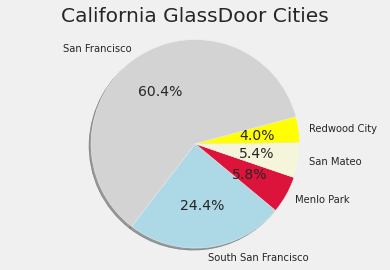

In [97]:
#Create a Pie Chart of CA and TX

max_state = ['CA' ]
for i,state in enumerate(max_state,1):
    cities = all_df[all_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = all_df[all_df["State"] == state]['City'].value_counts()[:5].to_list()

my_colors  = ['lightgray','lightblue','crimson', 'beige', 'yellow']
my_explode = (0, 0.1, 0)

plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('California GlassDoor Cities')
plt.axis('equal')
plt.show()   

## Q15. Write the code to create a pie chart for TX. 

Add a title to your pie chart

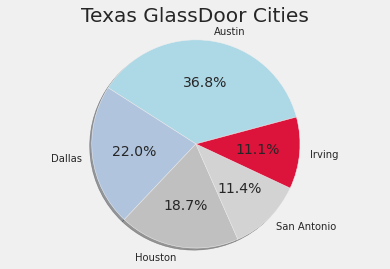

In [98]:
# Write code to create pie chart 
max_state = ['TX' ]
for i,state in enumerate(max_state,1):
    cities = all_df[all_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = all_df[all_df["State"] == state]['City'].value_counts()[:5].to_list()

my_colors  = ['lightblue','lightsteelblue','silver', 'lightgrey', 'crimson']
my_explode = (0, 0.1, 0)

plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('Texas GlassDoor Cities')
plt.axis('equal')
plt.show() 

# Using the Groupby functionality
A groupby operation involves some combination of splitting the object, 
applying a function, and combining the results. 

This can be used to group large amounts of data and compute operations on these groups.

This is shown in the example below

In [99]:
#Calculate the minimal salary for the states 
states = all_df['State'].unique().tolist()

min_sal =  all_df.groupby('State')['Min_Salary']
max_sal =  all_df.groupby('State')['Max_Salary']

min_sal.min()


State
CA    29611
DC    21096
MD    20268
NJ    38471
NY    20000
TX    19857
VA    29516
Name: Min_Salary, dtype: int64

## Q16. Use the groupby function to find the minimal salary for all companies
Print this information

In [100]:
min_sal_company =  all_df.groupby('Company')['Min_Salary']
min_sal_company.min()

Company
159 Solutions, Inc.          110591
1901 Group                   79171 
22nd Century Technologies    85715 
23andMe                      78913 
911 Datamaster Inc           45694 
                             ...   
price.com                    122998
steampunk                    108661
sydata                       109626
tekwissen                    24457 
vidIQ                        137812
Name: Min_Salary, Length: 959, dtype: int64

## Extracting Features out of Job Description 

In [101]:
# reset index first so that  we can use index 0 to access the first job description
all_df = all_df.reset_index(drop=True)

#Let's look at  how the job description actually looks
x = all_df.Job_Desc[0].replace('\n\n' , '\n')
x = x.split('\n')

print(*x , sep = '\n')

Principle Duties & Responsibilities:
Analyze complex systems and troubleshoot and isolate system issues;
Understand requirements for business users and translate into design specifications, utilizing thorough understanding of the Salesforce platform, Salesforce products and licensing models;
Utilize thorough understanding of application development, project lifecycle, and methodologies and ability to work under tight deadlines and handle multiple detail-oriented tasks;
Apply knowledge of Salesforce developmentand customizations, with APEX, Visual Force, API, Force.com and Workflows, taking into account com best practices, support mechanisms, procedures, and limitations, as well as NDR's unique needs;
Responsible for Salesforce administration, release management and deployment as well as management of Salesforce.com sandboxes, including their integrations;
Design and execute Salesforce.com configuration changes, leveraging the Salesforce interface to sync with internal tracking systems;

## Q17. What are some observations that you noticed about the job description column. What's the format or structure of the job description

The data in Job Description column is in string format with all the information regarding duties, requirements, and benefits. Since this is like a paragraph, this description has special string characters like new line characters. Sometimes, it has double new line characters probably to separate groups of texts into paragraphs.

    
    
    
# Cleaning up HTML Artifiacts 
Sometimes you will need to clean up the data
Use the regular expression library to do that
Use the `replace` function

In [102]:
#Let's clean up the \n and remove punction marks
all_df['Job_Desc'] = all_df['Job_Desc'].replace('\n\n' , " " , regex = True)
all_df['Job_Desc'] = all_df['Job_Desc'].replace('\n' , " " , regex = True)

test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n\n' , " " , regex = True)
test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n' , " " , regex = True)
#Let's remove punctuation and Stopwords

from gensim.parsing.preprocessing import remove_stopwords
def Remove_puncutations_stopwords(s):

    s = ''.join([i for i in s if i not in string.punctuation])
    s = remove_stopwords(s)
    return s

data_df['Job_Desc'] = data_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

data_df['Job_Desc'][2]
test_df['Job_Desc'] = test_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

After you worked with some data sometimes you'll need to save it to work with late

In [103]:
all_df.to_csv("all_data.csv" , index = False)

# to donwload file to local storage from google colabw
# from google.colab import files
# files.download("all_data.csv")